In [1]:
import json
from pyecharts import options as opts
from pyecharts.charts import Graph, Page

with open(r"./data/weibo.json", "r", encoding="utf-8") as f:
          j = json.load(f)
          nodes, links, categories, cont, mid, userl = j

graph= (Graph()
         .add("", nodes, links, categories, repulsion=50,
             linestyle_opts=opts.LineStyleOpts(curve=0.2),
             label_opts=opts.LabelOpts(is_show=False) )
         .set_global_opts(legend_opts=opts.LegendOpts(is_show=False),
             title_opts=opts.TitleOpts(title="Graph-微博转发关系图")))
graph.render('./results/weibo.html')


'd:\\D\\2023_Fall\\required_course\\data_visualization\\exps\\exp2\\results\\weibo.html'

In [2]:
import requests
from bs4 import BeautifulSoup
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
import matplotlib.pyplot as plt
from lxml import etree

# 获取百度热搜榜的网页内容
url = "https://top.baidu.com/board?platform=wise"
response = requests.get(url)
# 将text导出至文件
# with open('./results/response.html', 'w', encoding='utf-8') as f:
#   f.write(response.text)
soup = BeautifulSoup(response.text, 'html.parser')
# 提取出热搜词条和它们的排名
# 使用CSS选择器获取元素
elements = soup.select('div.row-start-center.zkwvwdF0VfxBzs7BSEZ1A div._2iegwST7utDAJiwI_rZCXM > span')
hot_searches = {}
for i, element in enumerate(elements, 1):
  if i > 20:  # 只需要前20个热搜词条
    break
  hot_searches[element.contents[0]] = 21 - i  # 排名越高，权重越大


# 生成词云

wordcloud = WordCloud()
# wordcloud = WordCloud(init_opts=opts.InitOpts(width='100%', height='100%'))
wordcloud.add("", hot_searches.items(), word_size_range=[10, 40])
wordcloud.set_global_opts(title_opts=opts.TitleOpts(title="Baidu Hot Searches"))
wordcloud.render("./results/hot_searches.html")

'd:\\D\\2023_Fall\\required_course\\data_visualization\\exps\\exp2\\results\\hot_searches.html'

In [3]:
# 3
from pyecharts.charts import Bar 
from pyecharts import options as opts 
import pandas as pd

def convert_to_int(num):
    try:
        return int(num)
    except ValueError:
        return 0

df = pd.read_excel('./data/student.xls')
for col in df.columns[4:10]:
    df[col] = df[col].apply(convert_to_int)
    
## 总分
df['总分'] = df.loc[:, '英语':'解几'].sum(axis=1)
# print(df['总分'])
bar = (Bar()
  .add_xaxis(df['姓名'].tolist())
  .add_yaxis('总分', df['总分'].tolist())
  .set_global_opts(title_opts=opts.TitleOpts(
    title='学生成绩柱状图', 
    subtitle='学生姓名与总分'), 
    toolbox_opts=opts.ToolboxOpts(), 
    legend_opts=opts.LegendOpts(is_show=True)))
# 柱状图各总分
bar.render('./results/all_students.html')



'd:\\D\\2023_Fall\\required_course\\data_visualization\\exps\\exp2\\results\\all_students.html'

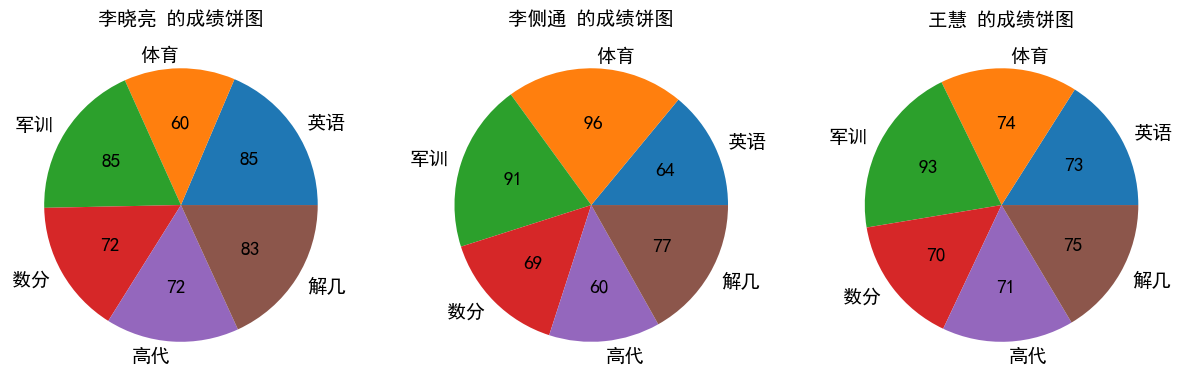

In [26]:
# 饼图前三名
from pyecharts.charts import Pie, Grid
top3 = df.sort_values(by='总分', ascending=False).head(3)
# print(type(top3))
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\\Windows\\Fonts\\simhei.ttf', size=14)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (index, student) in enumerate(top3.iterrows()):
  scores = student[['英语', '体育', '军训', '数分', '高代', '解几']]
  # print(scores)
  axs[i].pie(scores, labels=scores.index, autopct=lambda p: f'{p * sum(scores) / 100 :.0f}', textprops={'fontproperties': myfont})
  axs[i].set_title(f"{student['姓名']} 的成绩饼图", fontproperties=myfont)

plt.savefig('./results/top3.png')
plt.show()

In [5]:
# 英语，数分，高代，解几四门课程的成绩分布图
from pyecharts.charts import Line
from pyecharts import options as opts

# 创建分数段
bins = list(range(0, 101, 10))
labels = [f'{i}-{i+10}' for i in range(0, 100, 10)]

line = Line()

for course in ['英语', '数分', '高代', '解几']:
  df[course + '_分数段'] = pd.cut(df[course], bins=bins, labels=labels, right=False)
  counts = df[course + '_分数段'].value_counts().sort_index()
  line.add_xaxis(labels)
  line.add_yaxis(course, counts.tolist())

# 设置图表的标题和标签格式
line.set_global_opts(title_opts=opts.TitleOpts(title="四门课程的成绩分布折线图"),
           xaxis_opts=opts.AxisOpts(name="分数段"),
           yaxis_opts=opts.AxisOpts(name="人数"))

line.render('./results/四门课程成绩分布折线图.html')

'd:\\D\\2023_Fall\\required_course\\data_visualization\\exps\\exp2\\results\\四门课程成绩分布折线图.html'

In [6]:
# 利用柱状图展示男生和女生各科平均成绩的对比。
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.options import ItemStyleOpts

# 计算男生和女生各科的平均成绩
avg_scores_male = df[df['性别'] == '男'][['英语', '体育', '军训', '数分', '高代', '解几']].mean().round(2)
avg_scores_female = df[df['性别'] == '女'][['英语', '体育', '军训', '数分', '高代', '解几']].mean().round(2)

bar = (Bar()
  .add_xaxis(['英语', '体育', '军训', '数分', '高代', '解几'])
  .add_yaxis("男生", avg_scores_male.tolist(), itemstyle_opts=ItemStyleOpts(color='lightblue'))
  .add_yaxis("女生", avg_scores_female.tolist(), itemstyle_opts=ItemStyleOpts(color='pink'))
  .set_global_opts(title_opts=opts.TitleOpts(title="男生和女生各科平均成绩的对比柱状图")))

bar.render('./results/男女平均成绩对比.html')

'd:\\D\\2023_Fall\\required_course\\data_visualization\\exps\\exp2\\results\\男女平均成绩对比.html'